# Gradient Boosting Machine - GBM

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import cross_validation, metrics            #Additional scklearn functions
from sklearn.grid_search import GridSearchCV             #Perforing grid search

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

import matplotlib.pylab as pltlap
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Manipulate Data

In [151]:
train = pd.read_csv("D:/Master ML/1-First Semester/4- Data Analysis Tools/7-kaggle_practice/kaggle_practice/train.csv")

train.drop (['MSZoning' , 'Street' , 'Alley', 'LotShape', 'LandContour' , 'Utilities' , 'LotConfig' , 'LandSlope' , 'Neighborhood',
            'Condition1' , 'Condition2', 'BldgType' , 'HouseStyle' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st',
             'Exterior2nd' , 'MasVnrType' , 'ExterQual' , 'ExterCond' , 'Foundation' , 'BsmtQual' , 'BsmtCond' ,
             'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'Heating' , 'HeatingQC' , 'CentralAir' , 'Electrical' ,
             'KitchenQual' , 'Functional' , 'FireplaceQu' , 'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 
             'PavedDrive' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'SaleCondition','Id','SaleType'
            ] , 1 , inplace = True)


train = train.replace(0, np.NaN)     # mark zero values as missing or NaN
train.fillna(0, inplace=True)
#train.dropna(inplace=True)          # mark zero values as missing or NaN  .fillna(0) - df.fillna(0)
print(train.shape)                   # summarize the number of rows and columns in the dataset

train.columns = train.columns.str.lower()  # Solving Error : DataFrame' object has no attribute 'to_numeric

train.replace('NA', -99999 , inplace =True)

(1460, 37)


# Proceeding Functions

In [196]:
x= np.array(train.drop(['saleprice'], 1))     # features - x
y= np.array(train['saleprice'])               # target - y

cv_score = x_train, x_test , y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2 , random_state = 2)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
GMB = GradientBoostingRegressor(**params)

In [197]:
fit = GMB.fit(x_train, y_train)                                  # Fit - x , y Train
predxTest = fit.predict(x_test)                                  # Predict - x Test

In [198]:
r2 = r2_score(y_test, predxTest)                                 # Score - Coefficient of determination
mse = mean_squared_error(y_test, predxTest)                      # Mean Square Error

In [209]:
print ("R2 Score Test - Accuracy Test : " , r2)
print ("Mean Square Error : " , mse)

R2 Score Test - Accuracy Test :  0.891874617995
Mean Square Error :  716034969.736


In [212]:
cv = cross_validation.cross_val_score(GMB, x, y)
print ("CV Score : Mean = %.7g | Std = %.7g | Min = %.7g | Max = %.7g" %
      (np.mean(cv),np.std(cv),np.min(cv),np.max(cv)))

CV Score : Mean = 0.8753821 | Std = 0.01831962 | Min = 0.8587843 | Max = 0.9009088


# Plot training deviance

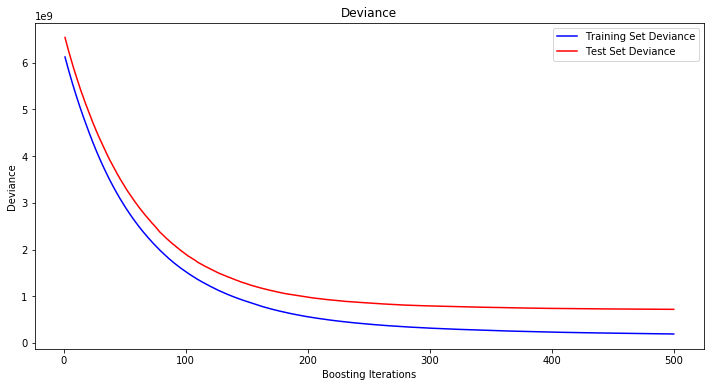

In [173]:
# Let's plot how does it behave the training and testing error -  Plot training deviance
# compute test set deviance

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(GMB.staged_predict(x_test)):
    test_score[i] = GMB.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)

plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GMB.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Plot feature importance

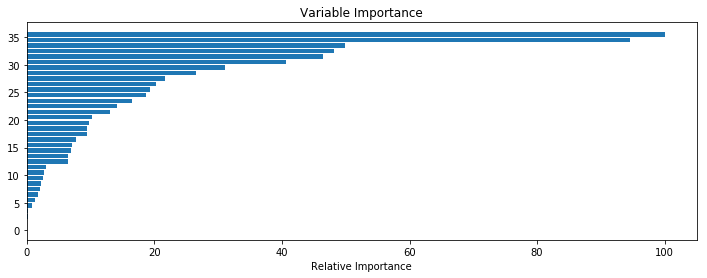

In [190]:
feature_importance = GMB.feature_importances_
# make importances relative to max importance

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')

#plt.yticks(pos, train.fireplaces[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

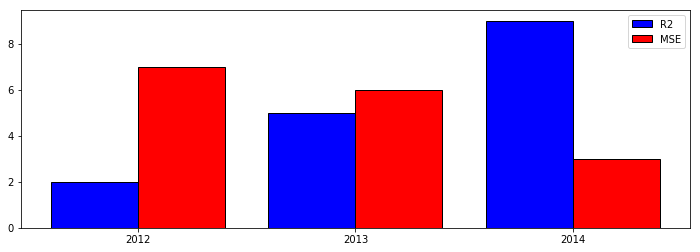

In [245]:
years = np.arange(2012, 2015)
r2 = [2, 5, 9]
mse = [7, 6, 3]

plt.figure()

plt.bar(years - 0.2, r2, color='blue', edgecolor='black', width=0.4, align='center', label='R2')
plt.bar(years + 0.2, mse, color='red', edgecolor='black', width=0.4, align='center', label='MSE')
plt.xticks(years, [str(year) for year in years])

plt.legend();

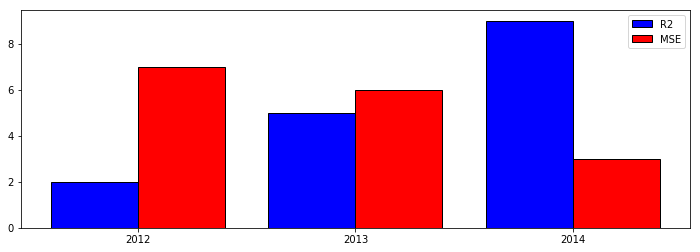

In [243]:
years = np.arange(2012, 2015)
category1_values = [2, 5, 9]
category2_values = [7, 6, 3]

plt.figure()

plt.bar(years - 0.2, category1_values, color='blue', edgecolor='black', width=0.4, align='center', label='R2')
plt.bar(years + 0.2, category2_values, color='red', edgecolor='black', width=0.4, align='center', label='MSE')
plt.xticks(years, [str(year) for year in years])

plt.legend();

Notes :
---------
Fit and predict :  
--------------
clf.fit(x_train, y_train)                       # Train the model using the training sets

preds = regr.predict(x_train)                 # Make predictions using the testing set  -> y_pred

You can using fit with param

params = {'n_estimators': 1000, 'max_depth': 6,  'learning_rate': 0.1, 'loss': 'huber','alpha':0.95}

fit = GMB(**params).fit(x_train, y_train)    - You can determind lenght

predxTest = fit.predict(x_test)                  # OR RF.predict(test[features])


score / r2 / accuracy :
------------------------
    
1- Score = clf.score(x_test,y_test)             # Explained variance score: 1 is perfect prediction -> Accuracy

2- AUC = accuracy_score(y_test, predxTest) - Not Working just with classification

3- R2 = r2_score(y_test, predxTest)  - Working with Regressor

Mse :
----
mse = mean_squared_error(y_test, predxTest)  - OR

mseFull = np.mean((y_train - preds)**2) 